In [9]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [10]:
train_ds="/Users/jayasakthibalajig/Sakthi/DiseaseDetection/train/"
test_ds="/Users/jayasakthibalajig/Sakthi/DiseaseDetection/valid/"

import os
cwd = os.getcwd()
print(cwd)

/Users/jayasakthibalajig/Sakthi/DiseaseDetection


In [11]:
import os


def change():
    os.chdir("/Users/jayasakthibalajig/Sakthi/CropManagement/train")
    import subprocess
    subprocess.call("Run.sh")

# change()

root_path = r"/Users/jayasakthibalajig/Sakthi/DiseaseDetection/train/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

class_dis = []
for name in class_names:
    class_path = os.path.join(root_path, name)
    if os.path.isdir(class_path):
        class_dis.append(len(os.listdir(class_path)))
    else:
        print(f"Warning: Directory '{class_path}' does not exist.")

print(f"Total Number of Classes: {n_classes}")
print(f"Class Names: {class_names}")
for name, count in zip(class_names, class_dis):
    print(f"{name}: {count}")


Total Number of Classes: 10
Class Names: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Tomato___Bacterial_spot: 1702
Tomato___Early_blight: 1920
Tomato___Late_blight: 1851
Tomato___Leaf_Mold: 1882
Tomato___Septoria_leaf_spot: 1745
Tomato___Spider_mites Two-spotted_spider_mite: 1741
Tomato___Target_Spot: 1827
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961
Tomato___Tomato_mosaic_virus: 1790
Tomato___healthy: 1926


In [12]:
import plotly.express as px

In [13]:
os.listdir("/Users/jayasakthibalajig/Sakthi/DiseaseDetection/train")

['Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Septoria_leaf_spot']

In [14]:
os.listdir("/Users/jayasakthibalajig/Sakthi/DiseaseDetection/valid")

['Tomato___Target_Spot',
 '.DS_Store',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Septoria_leaf_spot']

In [15]:
batch_size=32
img_size=224

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [17]:
test_generator[0][0].shape

(32, 224, 224, 3)

In [18]:
img= train_generator[0]
print(img)

(array([[[[0.5627717 , 0.523556  , 0.52747756],
         [0.5627717 , 0.523556  , 0.52747756],
         [0.5627717 , 0.523556  , 0.52747756],
         ...,
         [0.6313726 , 0.60784316, 0.6156863 ],
         [0.6313726 , 0.60784316, 0.6156863 ],
         [0.6313726 , 0.60784316, 0.6156863 ]],

        [[0.46751434, 0.42829865, 0.43222022],
         [0.46751434, 0.42829865, 0.43222022],
         [0.46751434, 0.42829865, 0.43222022],
         ...,
         [0.6332381 , 0.6097086 , 0.61755174],
         [0.6332381 , 0.6097086 , 0.61755174],
         [0.6332381 , 0.6097086 , 0.61755174]],

        [[0.42463994, 0.38542426, 0.38934582],
         [0.42463994, 0.38542426, 0.38934582],
         [0.42463994, 0.38542426, 0.38934582],
         ...,
         [0.6463701 , 0.6228407 , 0.63068384],
         [0.6463701 , 0.6228407 , 0.63068384],
         [0.6463701 , 0.6228407 , 0.63068384]],

        ...,

        [[0.38431376, 0.34117648, 0.3647059 ],
         [0.38431376, 0.34117648, 0.3647059 

In [19]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [20]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 10)


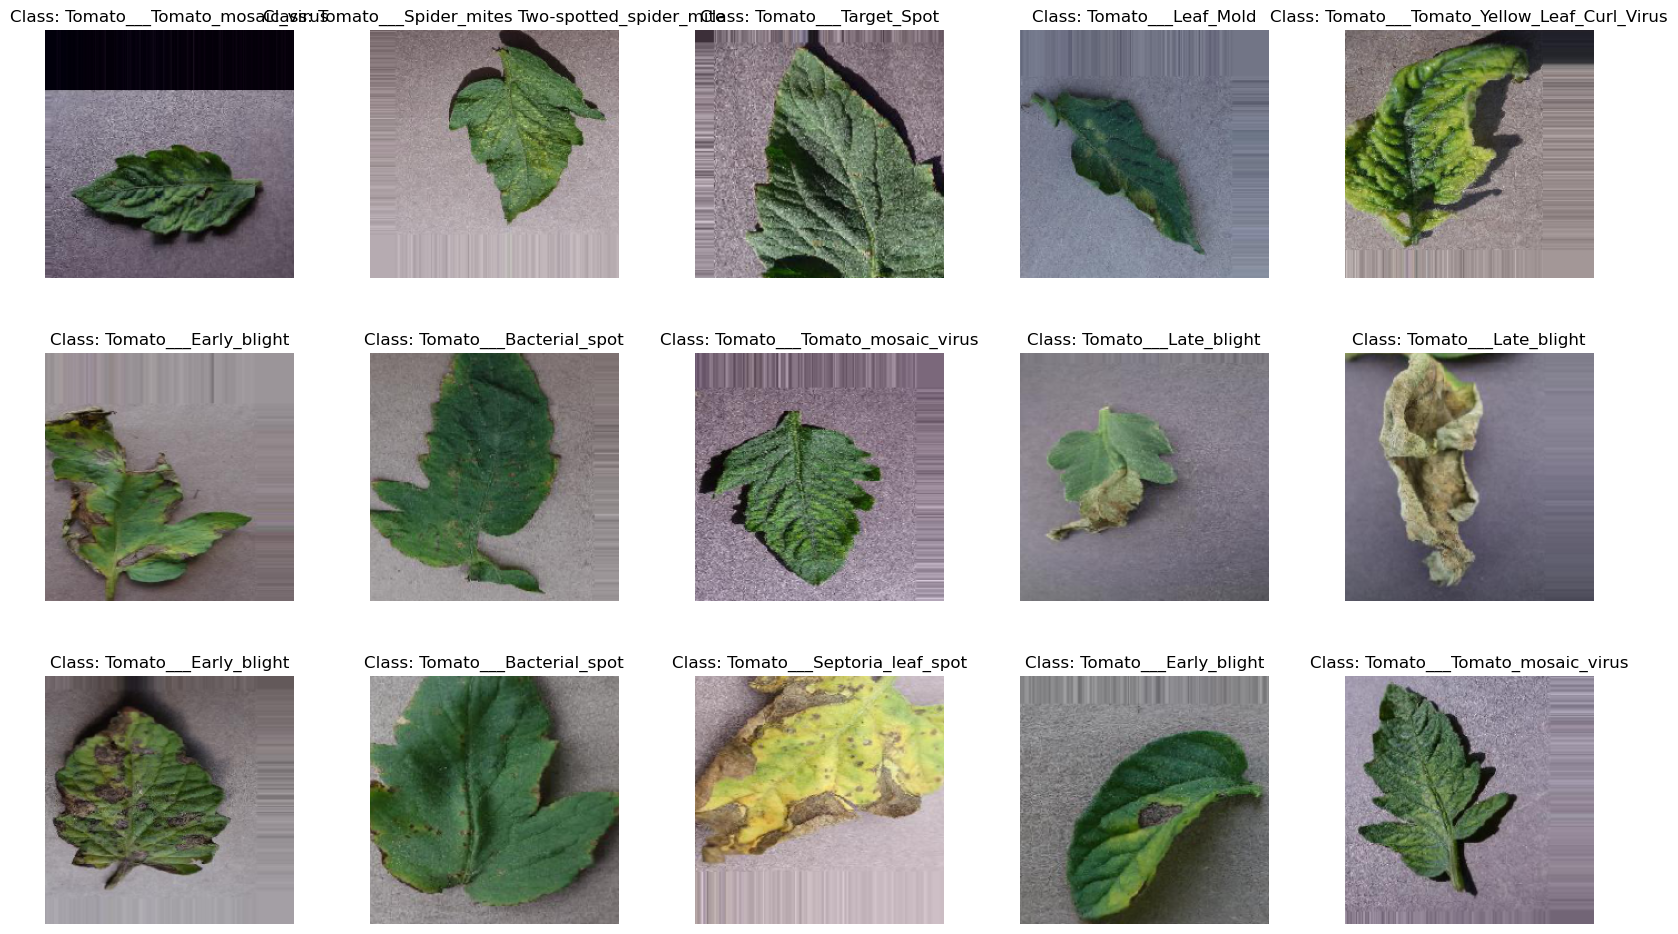

In [21]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [22]:
print(len(train_generator))
print(len(test_ds))

574
55


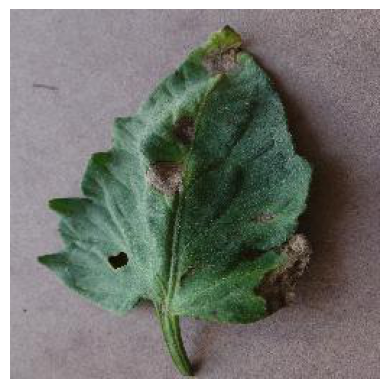

In [24]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/Users/jayasakthibalajig/Sakthi/DiseaseDetection/valid/Tomato___Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
from keras.layers import MaxPool2D

In [26]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

In [27]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes =10

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

/var/folders/6g/4xs5vtms423996692rqhqww80000gn/T/ipykernel_37935/129482978.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [28]:
model = mobilenet((224, 224, 3))

/var/folders/6g/4xs5vtms423996692rqhqww80000gn/T/ipykernel_37935/129482978.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


In [29]:
# Print the model summary

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [31]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [32]:
history =model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10


/Users/jayasakthibalajig/Sakthi/Anaconda/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


574/574 ━━━━━━━━━━━━━━━━━━━━ 872s 2s/step - accuracy: 0.6619 - loss: 1.0682 - val_accuracy: 0.9634 - val_loss: 0.1113
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 884s 2s/step - accuracy: 0.9490 - loss: 0.1531 - val_accuracy: 0.9821 - val_loss: 0.0549
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 872s 2s/step - accuracy: 0.9754 - loss: 0.0784 - val_accuracy: 0.9841 - val_loss: 0.0555
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 886s 2s/step - accuracy: 0.9807 - loss: 0.0561 - val_accuracy: 0.9911 - val_loss: 0.0287
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 972s 2s/step - accuracy: 0.9863 - loss: 0.0390 - val_accuracy: 0.9839 - val_loss: 0.0461
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1035s 2s/step - accuracy: 0.9900 - loss: 0.0294 - val_accuracy: 0.9836 - val_loss: 0.0514
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 929s 2s/step - accuracy: 0.9912 - loss: 0.0263 - val_accuracy: 0.9904 - val_loss: 0.0265
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 875s 2s/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.99

In [34]:
n_categories = len(os.listdir("/Users/jayasakthibalajig/Sakthi/DiseaseDetection/valid/"))
n_categories

11

In [35]:
results =pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
5,0.989043,0.032957,0.983642,0.051404
6,0.989043,0.032189,0.990403,0.026524
7,0.991006,0.026194,0.991058,0.029378
8,0.993459,0.021195,0.989749,0.029133
9,0.991769,0.025689,0.991276,0.026700


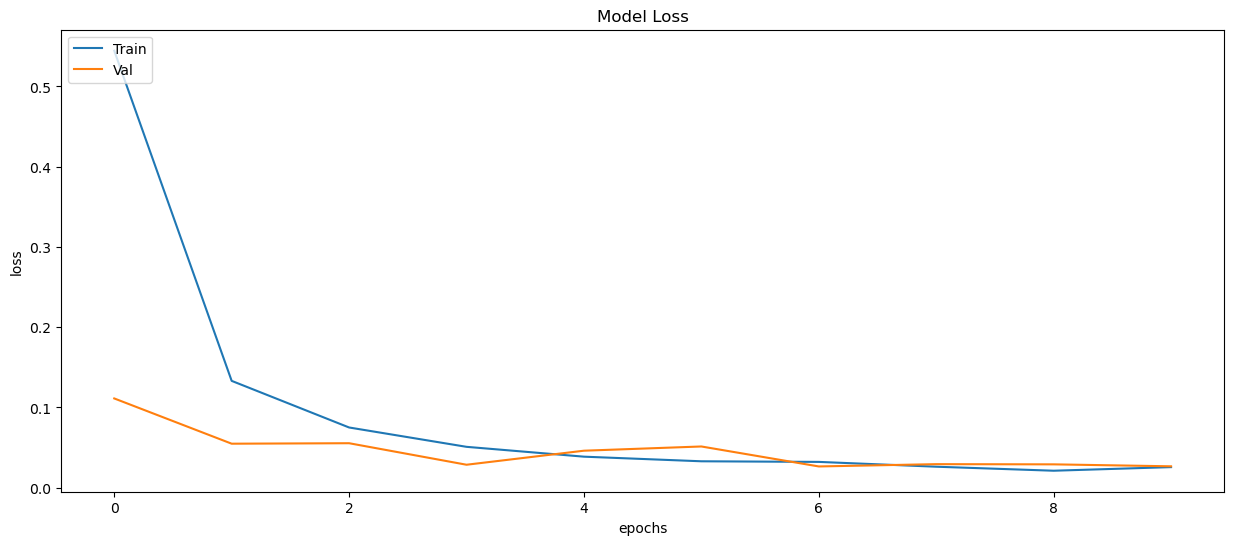

In [36]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

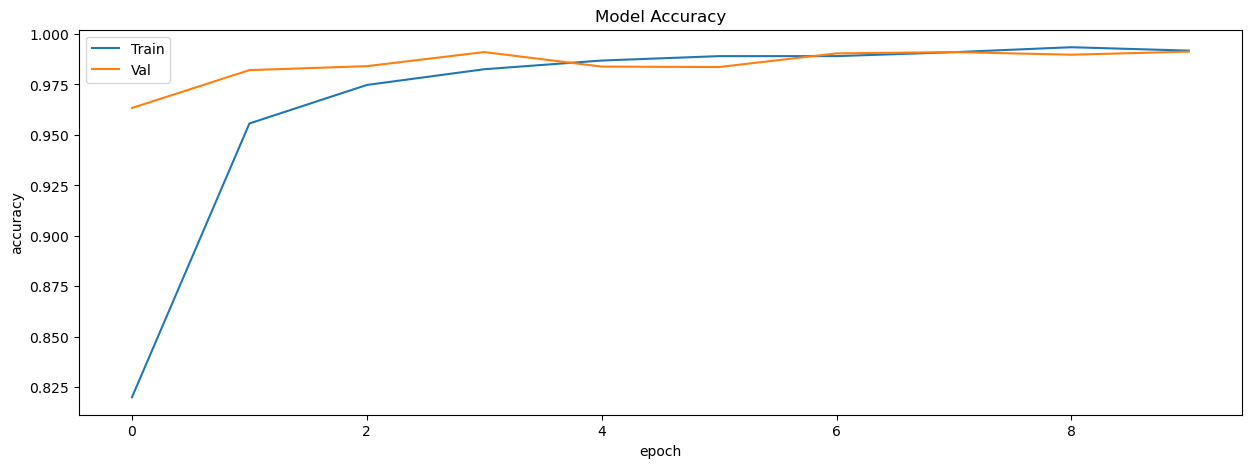

In [41]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [42]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step


In [43]:
results =model.evaluate(test_generator)

144/144 ━━━━━━━━━━━━━━━━━━━━ 33s 232ms/step - accuracy: 0.9910 - loss: 0.0274


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      0.99      0.99       480
           2       1.00      0.99      0.99       463
           3       1.00      0.99      0.99       470
           4       0.98      1.00      0.99       436
           5       1.00      0.96      0.98       435
           6       0.95      0.99      0.97       457
           7       1.00      1.00      1.00       490
           8       1.00      1.00      1.00       448
           9       1.00      1.00      1.00       481

    accuracy                           0.99      4585
   macro avg       0.99      0.99      0.99      4585
weighted avg       0.99      0.99      0.99      4585



In [45]:
model_json = model.to_json()
with open("/Users/jayasakthibalajig/Sakthi/DiseaseDetection/model_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [46]:
model.save_weights("/Users/jayasakthibalajig/Sakthi/DiseaseDetection/model_weights.weights.h5")

In [47]:
model.save("/Users/jayasakthibalajig/Sakthi/DiseaseDetection/model.h5")

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step


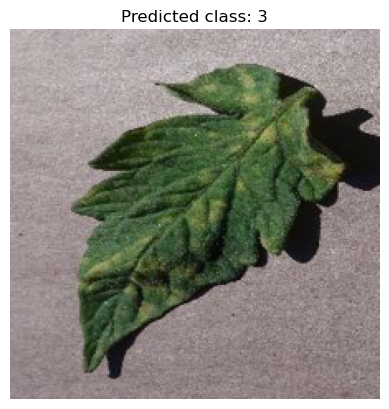

In [51]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = "/Users/jayasakthibalajig/Sakthi/DiseaseDetection/valid/Tomato___Leaf_Mold/"
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [52]:
count_bacterialSpot=0
count_earlyBlight=0
count_healthy=0
count_lateBlight=0
count_leafMold=0
count_septoriaLeafSpot=0
count_spiderMites=0
count_targetSpot=0
count_mosaicVirus=0
count_yellowVirus=0

for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    if(labels[predicted_class]=="Tomato___Bacterial_spot"):
        count_bacterialSpot+=1
    elif labels[predicted_class] == "Tomato___Early_blight":
        count_earlyBlight+=1
    elif labels[predicted_class] == "Tomato___healthy":
        count_healthy+=1
    elif labels[predicted_class] == "Tomato___Late_blight":
        count_lateBlight+=1
    elif labels[predicted_class] == "Tomato___Leaf_Mold":
        count_leafMold+=1
    elif labels[predicted_class] == "Tomato___Septoria_leaf_spot":
        count_septoriaLeafSpot+=1
    elif labels[predicted_class] == "Tomato___Spider_mites Two-spotted_spider_mite":
        count_spiderMites+=1
    elif labels[predicted_class] == "Tomato___Target_Spot":
        count_targetSpot+=1
    elif labels[predicted_class] == "Tomato___Tomato_mosaic_virus":
        count_mosaicVirus+=1
    elif labels[predicted_class] == "Tomato___Tomato_Yellow_Leaf_Curl_Virus":
        count_yellowVirus+=1
    print('Class probability:', class_probability)

Predicted class for 1.jpg : Tomato___Leaf_Mold
Class probability: 0.9978641
Predicted class for 2.jpg : Tomato___Leaf_Mold
Class probability: 1.0
Predicted class for 3.jpg : Tomato___Leaf_Mold
Class probability: 0.999971
Predicted class for 4.jpg : Tomato___Leaf_Mold
Class probability: 1.0
Predicted class for 5.jpg : Tomato___Leaf_Mold
Class probability: 0.9999989
Predicted class for 6.jpg : Tomato___Leaf_Mold
Class probability: 1.0
Predicted class for 7.jpg : Tomato___Leaf_Mold
Class probability: 0.99999845
Predicted class for 8.jpg : Tomato___Leaf_Mold
Class probability: 0.99858975
Predicted class for 9.jpg : Tomato___Leaf_Mold
Class probability: 0.99999726
Predicted class for 10.jpg : Tomato___Leaf_Mold
Class probability: 1.0
Predicted class for 11.jpg : Tomato___Leaf_Mold
Class probability: 0.95682573
Predicted class for 12.jpg : Tomato___Leaf_Mold
Class probability: 0.9999994
Predicted class for 13.jpg : Tomato___Leaf_Mold
Class probability: 1.0
Predicted class for 14.jpg : Tomato

In [53]:
print("Bacterial Spot : ",count_bacterialSpot)
print("Early Blight : ",count_earlyBlight)
print("Healthy : ",count_healthy)
print("latBlight : ",count_lateBlight)
print("Leaf Mold : ",count_leafMold)
print("Septorial Leaf Spot : ",count_septoriaLeafSpot)
print("Spider Mites : ",count_spiderMites)
print("Target Spot : ",count_targetSpot)
print("Mosaic Virus : ",count_mosaicVirus)
print("Yellow Virus : ",count_yellowVirus)

Bacterial Spot :  0
Early Blight :  0
Healthy :  0
latBlight :  0
Leaf Mold :  466
Septorial Leaf Spot :  3
Spider Mites :  1
Target Spot :  0
Mosaic Virus :  0
Yellow Virus :  0
